In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from compotime.preprocess import treat_small

In [2]:
def plot_time_series(
    time_series: pd.DataFrame,
    fitted_curve: pd.DataFrame = None,
    predictions: pd.DataFrame = None,
    num_series: int = None,
) -> None:
    if not num_series:
        num_series = time_series.shape[1]

    color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    colors = [color_cycle[i % len(color_cycle)] for i in range(num_series)]

    for i, (name, series) in enumerate(time_series.iloc[:, :num_series].items()):
        color = colors[i]
        series.plot(color=color, figsize=(10, 7), label=name)
        if fitted_curve is not None:
            fitted_curve.iloc[:, i].plot(color=color, linestyle="--", label="")

        if predictions is not None:
            predictions.iloc[:, i].plot(color=color, linestyle=":", label="")

    if predictions is not None:
        plt.axvline(predictions.index[0], color="red", linestyle="--")

    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left")  # Move legend to right corner
    plt.subplots_adjust(right=0.8)  # Adjust the right margin to make room for the legend
    plt.show()

In [3]:
df = pd.read_csv("data/dbrf.csv").assign(Year=lambda x: pd.to_datetime(x["Year"])).set_index("Year")

df.columns = map(str.strip, df.columns)  # TODO: Save data correctly
rng = np.random.default_rng(0)

nullable_periods = 15
years = pd.date_range("1990-01-01", periods=nullable_periods, freq="YS")
for col in df.columns:
    # Set different starts
    df.loc[years[: rng.integers(0, high=10, size=1).item()], col] = np.nan

df = df.div(df.sum(axis=1), axis=0)

df = treat_small(df, minimum=1e-6)
df

,Low physical activity,Non-exclusive breastfeeding,Air pollution,Child wasting,High systolic blood pressure,High fasting plasma glucose,Child stunting,High body-mass index,Secondhand smoke,Unsafe sanitation,...,Diet low in fruits,Diet high in sodium,Drug use,Household air pollution from solid fuels,High LDL cholesterol,Iron deficiency,Zinc deficiency,Smoking,Vitamin A deficiency,Ambient particulate matter pollution
Year,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,0.466793,0.000270,0.532938,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-01,NaN,NaN,NaN,NaN,NaN,0.415619,0.000238,0.497520,0.086623,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-01-01,NaN,NaN,NaN,0.008772,NaN,0.402496,0.000222,0.502876,0.085594,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000040,NaN
1993-01-01,NaN,NaN,NaN,0.005358,0.392438,0.240040,0.000127,0.310282,0.051730,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000024,NaN
1994-01-01,NaN,NaN,NaN,0.005405,0.390461,0.237511,0.000120,0.315287,0.051192,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000024,NaN
1995-01-01,NaN,NaN,0.088103,0.004715,0.338233,0.207060,0.000096,0.278883,0.044049,NaN,...,0.032837,NaN,NaN,NaN,NaN,0.006002,0.000002,NaN,0.000020,NaN
1996-01-01,NaN,0.000496,0.070698,0.003894,0.272650,0.169985,0.000074,0.230328,0.035159,NaN,...,0.026198,0.020354,NaN,NaN,0.164539,0.004816,0.000001,NaN,0.000016,NaN
1997-01-01,NaN,0.000490,0.070095,0.003996,0.271018,0.172972,0.000072,0.234835,0.034559,NaN,...,0.025725,0.020942,NaN,0.000230,0.159557,0.004702,0.000001,NaN,0.000016,NaN
1998-01-01,0.023883,0.000443,0.063741,0.003749,0.247056,0.162010,0.000063,0.219122,0.031047,0.000646,...,0.023140,0.019820,NaN,0.000208,0.142131,0.004153,0.000001,NaN,0.000014,0.058054


In [4]:
from compotime import LocalLevelForecaster

horizon = 10

model = LocalLevelForecaster().fit(df)
predictions = model.predict(horizon)

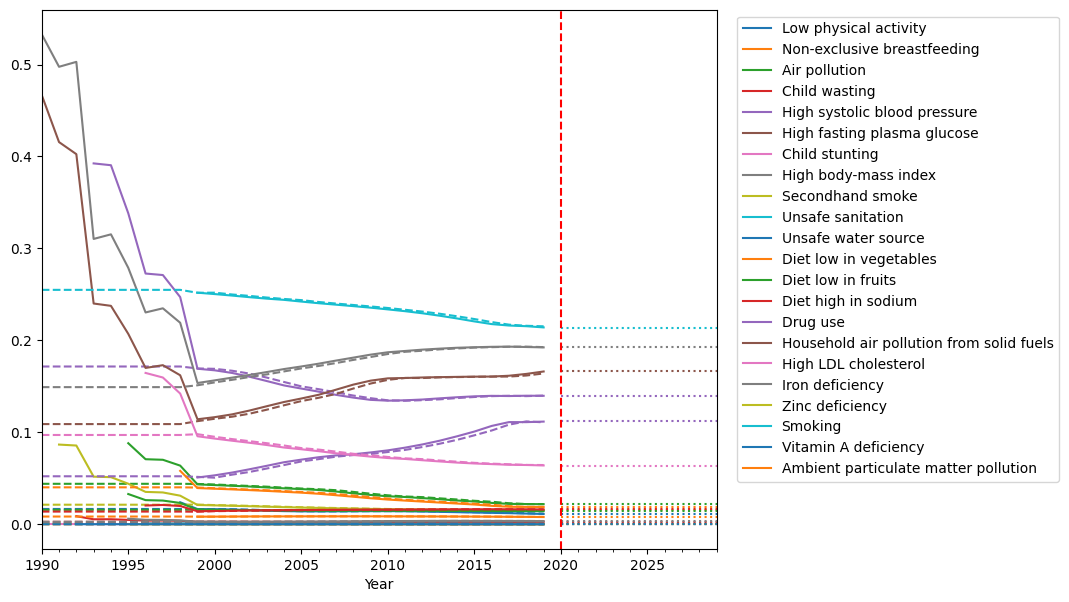

In [5]:
plot_time_series(df, model.fitted_curve_, predictions)

In [6]:
from compotime import LocalTrendForecaster

horizon = 10

model = LocalTrendForecaster().fit(df)
predictions = model.predict(horizon)

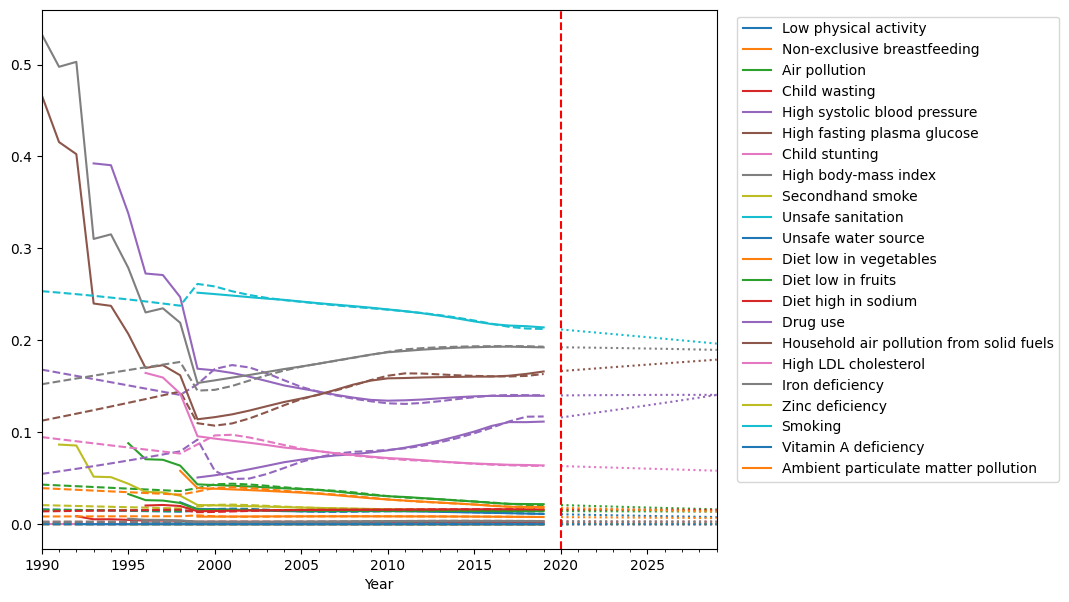

In [7]:
plot_time_series(df, model.fitted_curve_, predictions)